In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('../input/creditcard1/creditcard1.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df['Class'].unique()

array([0, 1])

In [6]:
#the above array represents that 0 is non fraud and 1 is fraud data

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#from above code, we can conclude that there are no null values in our dataset. Our dataset is clean

In [12]:
#Lets pre-process our data


In [13]:
#Let's remove time column as its of no use now
df=df.drop(['Time'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [14]:
#Lets transform our data now
#Except for the Amount column, all column’s values are within some range of values. So let's change the Amount columns values to a smaller range of numbers. 

#We can simply do this process by using StandardScaler from the sklearn library.
from sklearn.preprocessing import StandardScaler

In [15]:
df['New_amount']=StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(['Amount'],axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'New_amount'],
      dtype='object')

In [16]:
df['New_amount'].head()
#you can see in output that the values are in a specific range

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: New_amount, dtype: float64

In [17]:
#lets split the dataset

x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'New_amount']]
y=df[['Class']]

In [18]:
#lets train and test the dataset by applying train test split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


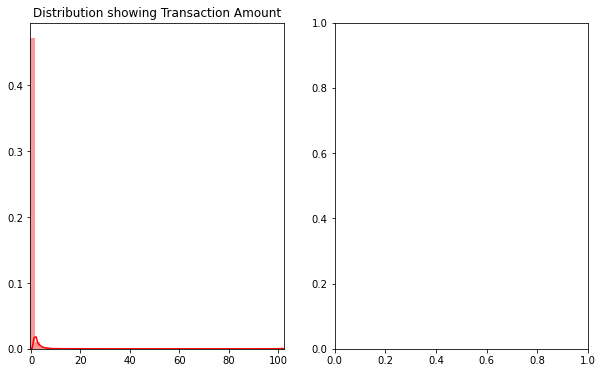

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))


amount_val = df['New_amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution showing Transaction Amount')
ax[0].set_xlim([min(amount_val), max(amount_val)])
plt.show()


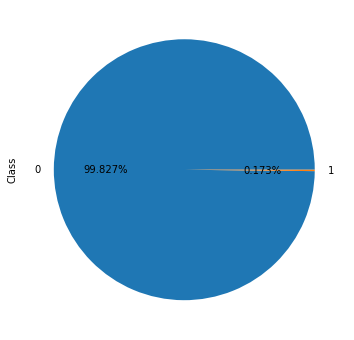

In [20]:
plt.figure(figsize=(10,6))
labels = 'Not Fraud', 'Fraud'
df['Class'].value_counts().plot.pie(autopct="%2.3f%%")

In [21]:
my_tab = pd.crosstab(index=df["Class"],columns="count") 
print(my_tab)

col_0   count
Class        
0      284315
1         492


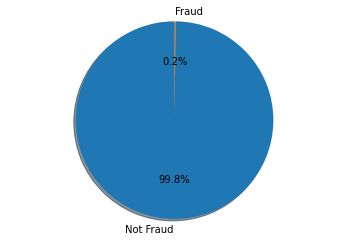

In [22]:
labels = 'Not Fraud', 'Fraud'
sizes = [my_tab["count"][0], my_tab["count"][1]]
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

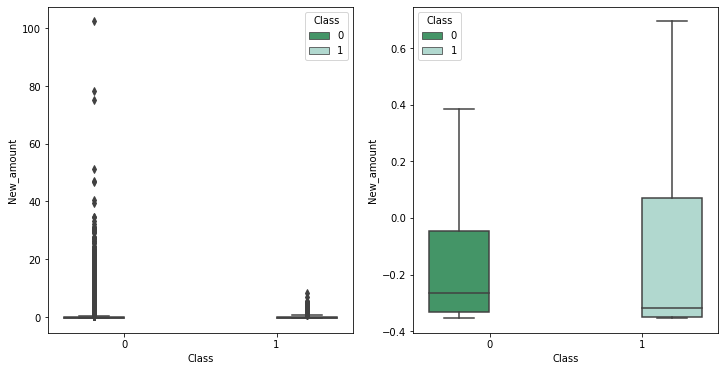

In [23]:
#These are the boxplots that displays fraud and genuine transactions. Here 1st is fraud and 2nd is non fraud
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="New_amount", hue="Class",data=df, palette="BuGn_r",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="New_amount", hue="Class",data=df, palette="BuGn_r",showfliers=False)
plt.show();

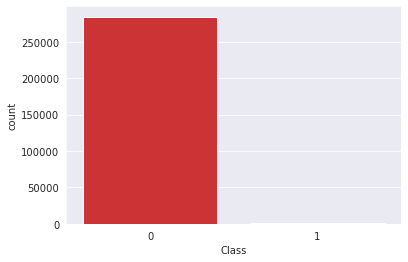

In [24]:
sns.set_style("darkgrid")
sns.countplot(x='Class',data=df,palette="Set1")

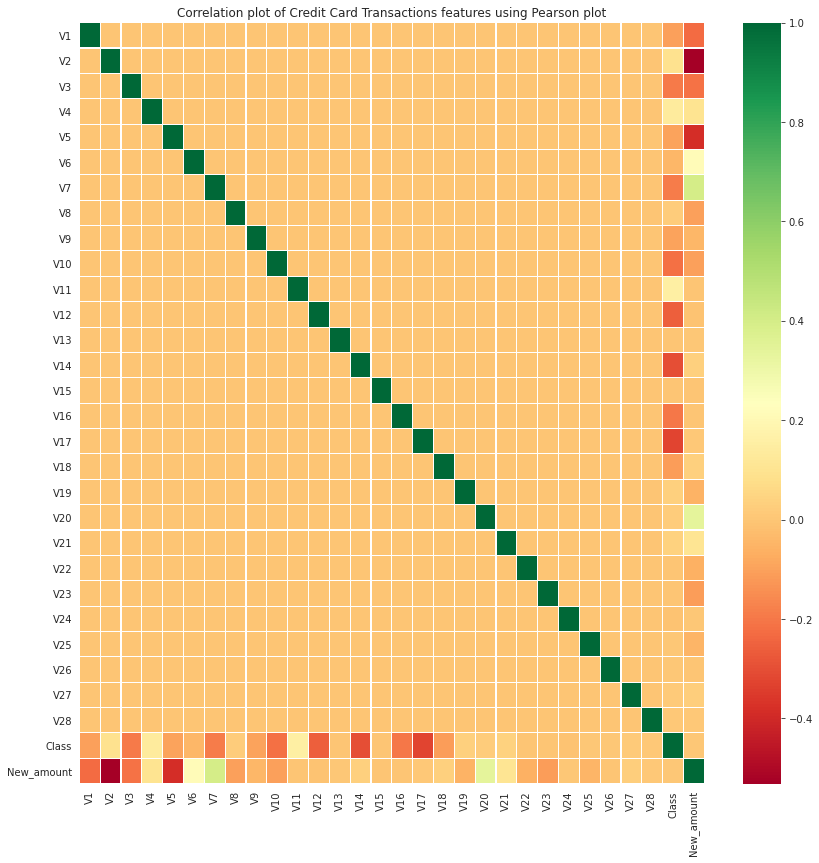

In [25]:
#Plotting correlation of Features
plt.figure(figsize = (14,14))
plt.title('Correlation plot of Credit Card Transactions features using Pearson plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="RdYlGn")
plt.show()

In [26]:
# https://github.com/mathiasjess/Credit_Card_Fraud/blob/master/Credit_Card_Fraud_Data_visualization.ipynb

<Figure size 432x288 with 0 Axes>

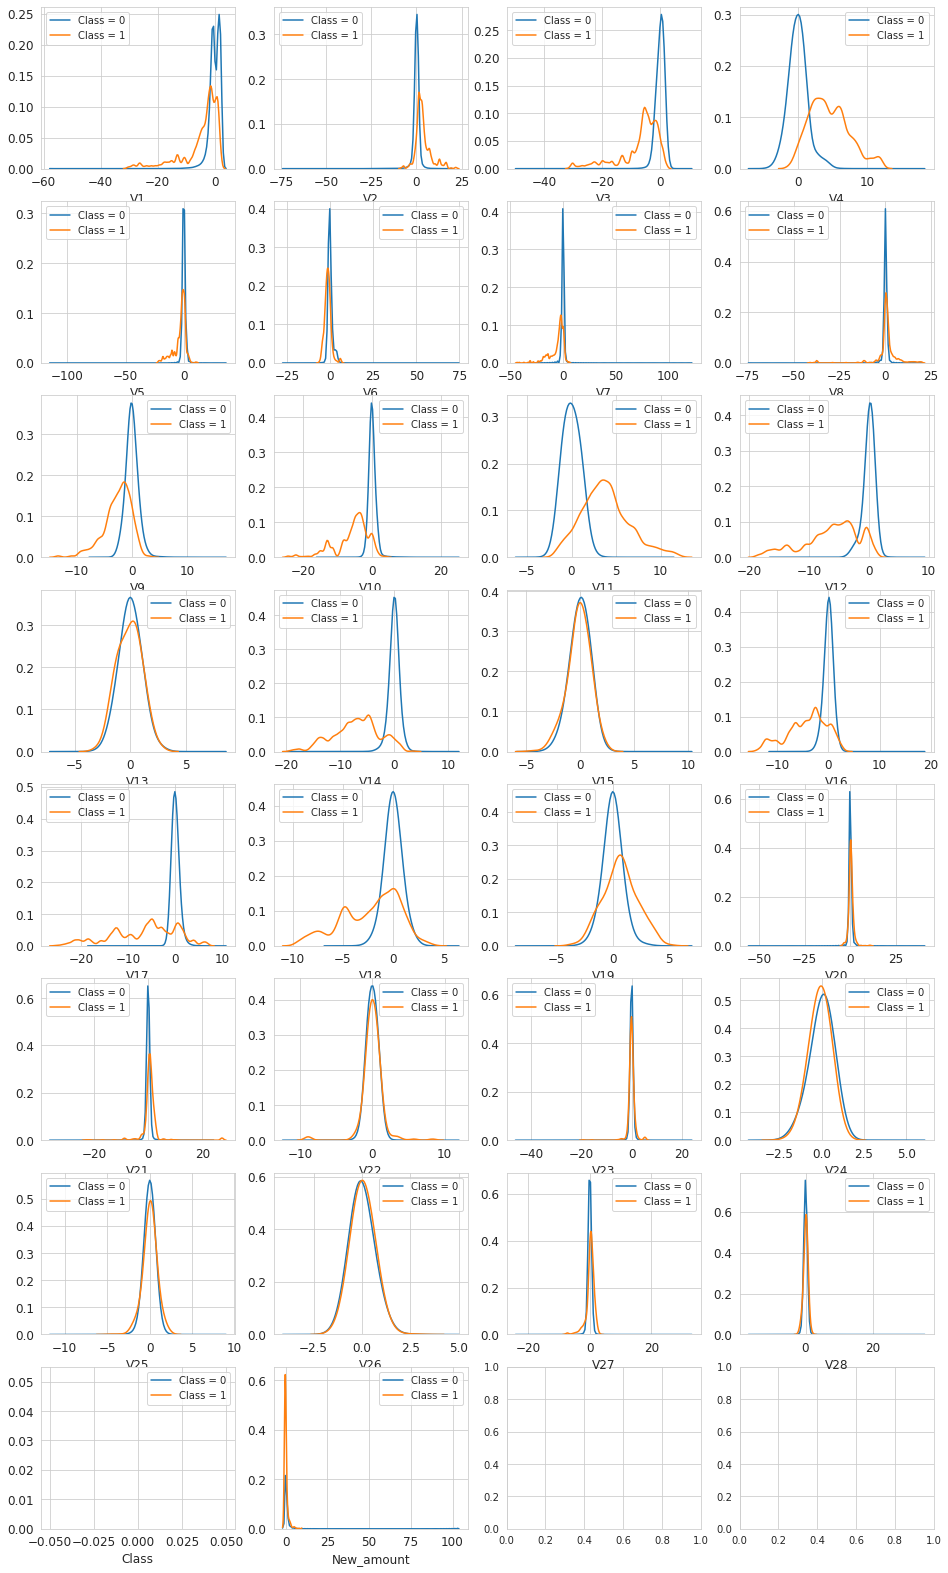

In [27]:
#Plotting feature density visualization
val = df.columns.values

i = 0
genuine = df.loc[df['Class'] == 0]
fraud = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(genuine[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('ccdgraphs.png',dpi=250)
plt.show();

In [28]:
#lets train and test the dataset by applying train test split method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)
lr_pred=model.predict(x_test)
print('Logistic Regression accuracy: ',metrics.accuracy_score(lr_pred,y_test))

Logistic Regression accuracy:  0.9990988144142879


In [30]:
#model=RandomForestClassifier(n_estimators=100)
#model.fit(x_train,y_train)
#rcf_pred=model.predict(x_test)
#print('RCF accuracy: ',metrics.accuracy_score(rcf_pred,y_test))

In [31]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5)
model.fit(x_train,y_train)
dt_pred=model.predict(x_test)
print('Decision tree accuracy: ',metrics.accuracy_score(dt_pred,y_test))

Decision tree accuracy:  0.9992626663389628


In [32]:
model=GaussianNB()
model.fit(x_train,y_train)
nb_pred=model.predict(x_test)
print('Naive Bayes accuracy: ',metrics.accuracy_score(nb_pred,y_test))

Naive Bayes accuracy:  0.9786641386655431


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)
#At last we need to make prediction. It can be done with the help of following script −

y_pred = classifier.predict(x_test)
print('KNN accuracy: ',metrics.accuracy_score(y_pred,y_test))

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = svm.SVC(C=0.01, break_ties=False, cache_size=200,  class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('SVM accuracy: ',metrics.accuracy_score(y_pred,y_test))